<a href="https://colab.research.google.com/github/audalsgh/20250710/blob/main/0710_python_hough%2Byoutube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.필요한 라이브러리 임포트
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from google.colab.patches import cv2_imshow
import os

# OpenCV 버전 확인
print(f"OpenCV 버전: {cv2.__version__}")

# 영상 파일 경로 설정 (예시)
video_path = '/content/김영빈_영상.mp4'

OpenCV 버전: 4.11.0


In [ ]:
# 2. yt-dlp 설치
!pip install yt-dlp

# 원하는 유튜브 영상 다운로드
!yt-dlp -f bestvideo+bestaudio --merge-output-format mp4 https://www.youtube.com/watch?v=tEtWnGwwCEc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.8 MB/s eta 0:00:00
[youtube] Extracting URL: https://www.youtube.com/watch?v=tEtWnGwwCEc
[youtube] tEtWnGwwCEc: Downloading webpage
[youtube] tEtWnGwwCEc: Downloading tv client config
[youtube] tEtWnGwwCEc: Downloading player ef259203-main
[youtube] tEtWnGwwCEc: Downloading tv player API JSON
[youtube] tEtWnGwwCEc: Downloading ios player API JSON
[youtube] tEtWnGwwCEc: Downloading m3u8 information
[info] tEtWnGwwCEc: Downloading 1 format(s): 313+251
[download] Destination: 강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].f313.webm
[download] 100% of  239.46MiB in 00:00:58 at 4.13MiB/s
[download] Destination: 강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].f251.webm
[download] 100% of    2.25MiB in 00:00:00 at 8.55MiB/s
[Merger] Merging formats into "강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].mp4"
Deleting original file 강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. 

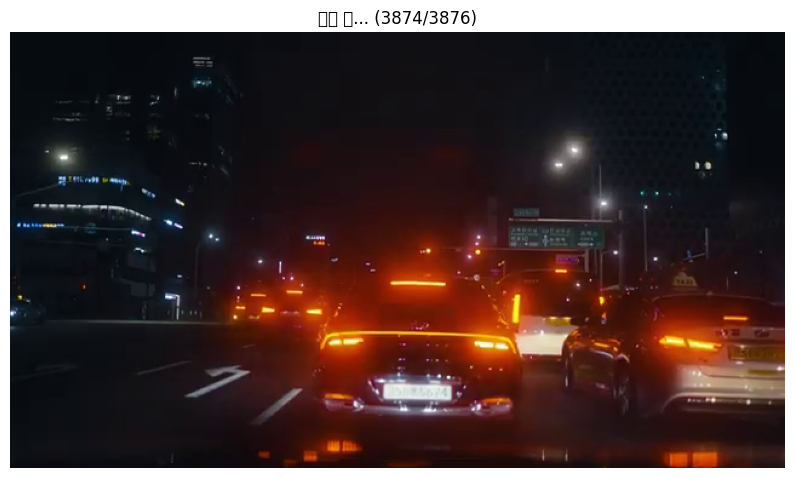

✅ 재생 완료!


In [ ]:
# 3.
import cv2
import yt_dlp
import matplotlib.pyplot as plt
import tempfile
import os
import time
from IPython.display import clear_output

def play_youtube_video(youtube_url, skip_frames=1):
    """
    YouTube 영상을 다운로드하고 재생하는 간단한 함수
    skip_frames: 프레임 건너뛰기 (1=모든 프레임, 2=한 프레임씩 건너뛰기)
    """

    ydl_opts = {
        'format': 'mp4/best[height<=480]',  # 480p로 제한 (빠른 처리)
        'outtmpl': tempfile.gettempdir() + '/temp_video.%(ext)s',
        'quiet': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            print("⬇️ 영상 다운로드 중...")
            info = ydl.extract_info(youtube_url, download=True)

            video_path = ydl.prepare_filename(info)

            cap = cv2.VideoCapture(video_path)
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            print(f"🎬 '{info['title']}' 재생 시작!")
            print("(Ctrl+C로 중단)")

            frame_num = 0
            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                # 프레임 건너뛰기
                if frame_num % skip_frames == 0:
                    clear_output(wait=True)
                    plt.figure(figsize=(10, 6))
                    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                    plt.title(f"재생 중... ({frame_num}/{frame_count})")
                    plt.axis('off')
                    plt.show()

                    # 재생 속도 조절
                    time.sleep(0.1)  # 0.1초 대기 (빠른 재생)

                frame_num += 1

            cap.release()
            os.remove(video_path)
            print("✅ 재생 완료!")

    except KeyboardInterrupt:
        print("\n⏹️ 재생 중단")
    except Exception as e:
        print(f"❌ 오류: {e}")

# 사용법
youtube_url = input("YouTube URL: ")
play_youtube_video(youtube_url, skip_frames=2)  # 한 프레임씩 건너뛰어 빠른 재생

미션. 이 코드에서 gpt를 이용해 몇가지 기능을 더 추가해보기.
1. 영상 저장 설정
2. 프레임 저장
3. output 리소스 정리
4. 결과 영상을 /content/lane_detection_result.mp4에 다운로드하기
5. ROI영역, canny엣지, hough변환, 인식된 차선만 있는 그림 등, 각 단계 별로 plot도 그려보기

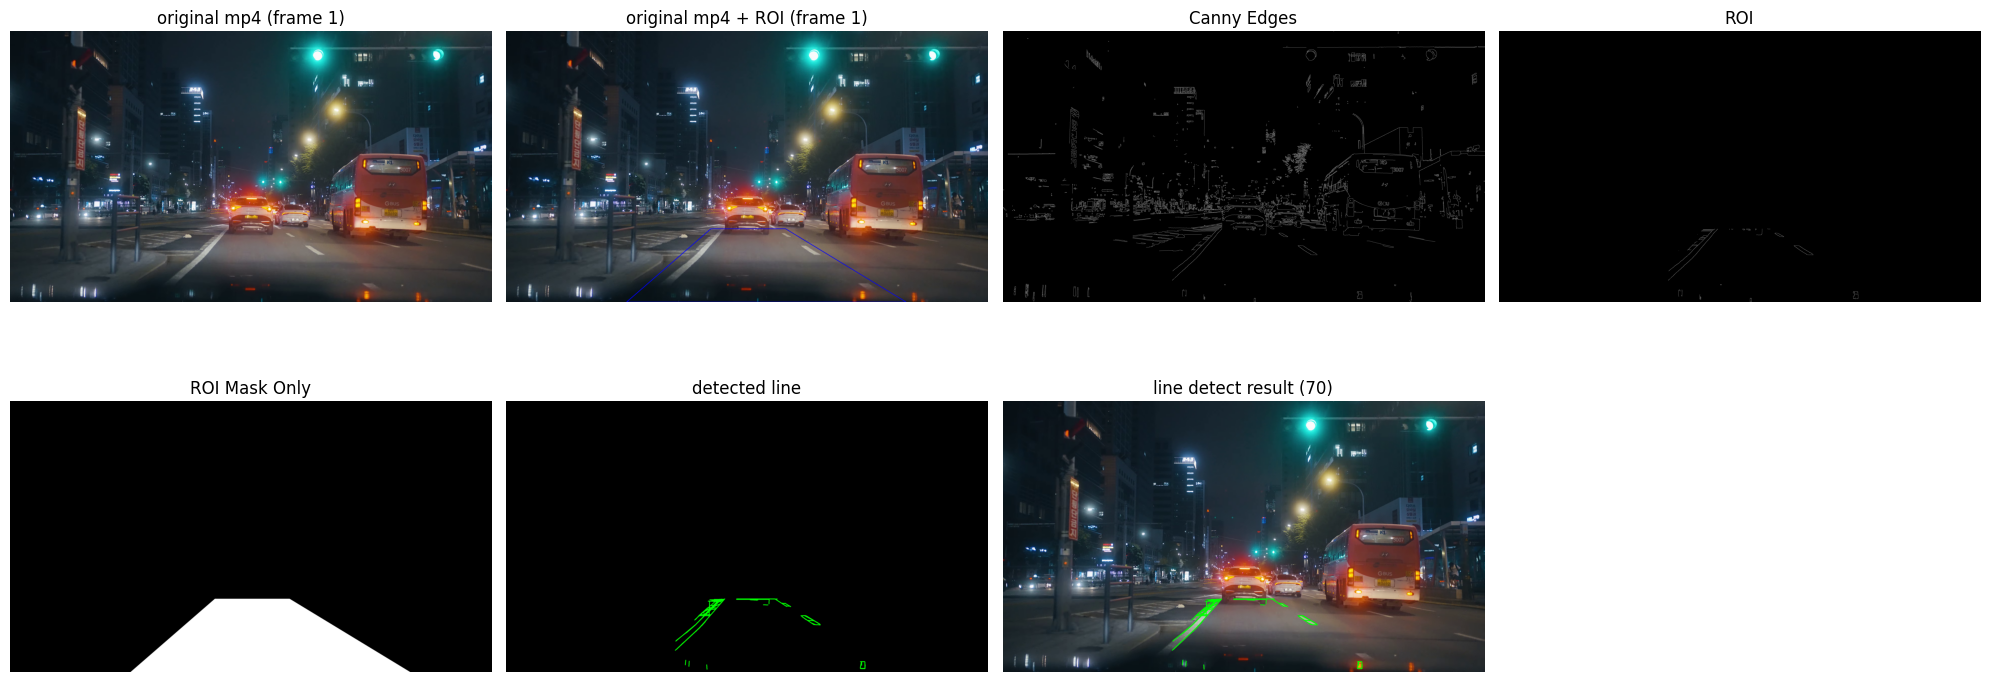

In [ ]:
# 4.
import cv2
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

# openCV 함수를 이용한 영상 업로드
#uploaded = files.upload()
video_path = "/content/강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].mp4"

# 영상 열기
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 새로 정의한 width외 height들
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"📹 영상 정보: {frame_count}프레임, {fps:.2f}FPS")
print("🎬 차선 인식 시작! (Ctrl+C로 중단)")

frame_num = 0

# 결과 영상을 저장하기위해 gpt로부터 추가한 코드, mp4파일로 저장하기위해 사용하는 문법이며, width, height도 따로 정의해줘야한다.
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/lane_detection_result.mp4', fourcc, fps, (width, height))

try:
    while True:
        ret, frame = cap.read()  #카메라 (혹은 비디오 파일)로부터 프레임을 읽어와 frame 에 저장
        if not ret:
            print("📺 영상 재생 완료")
            break

        # 1. 그레이스케일 변환
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 2. 블러 → 에지(Canny) - 임계값 낮춤
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blur, 30, 100)  # 50,150 → 30,100

        # 3. ROI 설정, (높이, 폭)을 갖는 0~255 정수 배열이 만들어지는데, np.zeros()라서 아직 값들은 모두 0이다.
        height, width = edges.shape
        mask = np.zeros_like(edges)
        polygon = np.array([[
            (int(width * 0.25), height),            # 왼쪽 아래
            (int(width * 0.83), height),            # 오른쪽 아래
            (int(width * 0.58), int(height * 0.73)), # 오른쪽 위 (73% 지점)
            (int(width * 0.425), int(height * 0.73))  # 왼쪽 위 (73% 지점)
        ]])
        cv2.fillPoly(mask, polygon, 255)
        roi = cv2.bitwise_and(edges, mask)

        # 4. Hough Transform으로 직선 검출 - 파라미터 완화
        lines = cv2.HoughLinesP(roi, 2, np.pi / 180,
                               threshold=30,      # 50 → 30
                               minLineLength=30,  # 40 → 30
                               maxLineGap=80)     # 50 → 80

        # 5. 원본 frame을 복사해와, 차선 그리기
        line_image = frame.copy()
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        # 6. 차선이 그려진 영상을 저장하기
        out.write(line_image)  # line_image라는 변수는 차선이 그려진 프레임! 이를 결과영상에 추가한다.

        # 7. 결과확인을 위한 plt들 출력 부분
        original_with_roi = frame.copy()  # 원본영상 + ROI영역이 그려진 그림 만들기.
        cv2.polylines(original_with_roi,
              [polygon],
              isClosed=True,
              color=(255, 0, 0),
              thickness=3)

        clear_output(wait=True)
        plt.figure(figsize=(20,8))
        plt.subplot(2, 4, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"original mp4 (frame {frame_num})")
        plt.axis("off")

        plt.subplot(2, 4, 2)
        plt.imshow(cv2.cvtColor(original_with_roi, cv2.COLOR_BGR2RGB))
        plt.title(f"original mp4 + ROI (frame {frame_num})")
        plt.axis('off')

        plt.subplot(2, 4, 3)
        plt.imshow(edges, cmap='gray')  # plt.imshow(프레임, cmap='gray')를 주면 픽셀 값(0~255)을 0=검은, 255=흰 으로 매핑한 프레임을 보여줌
        plt.title('Canny Edges')
        plt.axis('off')

        plt.subplot(2, 4, 4)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR))
        plt.title("ROI")
        plt.axis("off")

        plt.subplot(2, 4, 5)
        plt.imshow(mask, cmap='gray')
        plt.title("ROI Mask Only")
        plt.axis('off')

        line_only = np.zeros_like(frame)   # 녹색 선만 있는 이미지를 만드려면, 원본 frame과 동일 크기의 0(검은) 이미지에 그려낸다
        if lines is not None:
            for x1, y1, x2, y2 in lines[:, 0]:
                cv2.line(line_only, (x1, y1), (x2, y2), (0, 255, 0), 5)

        plt.subplot(2, 4, 6)
        plt.imshow(cv2.cvtColor(line_only, cv2.COLOR_BGR2RGB))
        plt.title("detected line")
        plt.axis("off")

        plt.subplot(2, 4, 7)
        plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
        plt.title(f"line detect result ({len(lines) if lines is not None else 0})")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        frame_num += 1
        time.sleep(0.1)  # 0.1초마다 영상처리를 하도록함

except KeyboardInterrupt:
    plt.close('all')
    print("\n⏹️ 재생 중단")

cap.release()
out.release()  # 마지막엔 파일 닫기